In [44]:
# 先看看数据长什么样子
import pandas as pd
df = pd.read_csv("data/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [45]:
# 删掉值太少的数据, 因为平衡性不好
ls = ['Id', 'Utilities', 'PoolQC', 'MiscFeature', 'Fence', 'MasVnrType', 'FireplaceQu']
for feature in ls:
    df.drop(columns=[feature], inplace=True)
# df.info()

In [46]:
# df.describe()

In [47]:
# 统计缺失值
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

Alley           1369
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [48]:
features_all = list(df.columns)
features_cate = df.select_dtypes(include=['object']).columns.tolist() # 分类的特征
features_cate.append("MSSubClass") # MSSubClass根据文档是分类的, 数值无关
features_numr = [feature for feature in features_all if feature not in features_cate]
len(features_all), len(features_cate), len(features_numr)

(74, 38, 36)

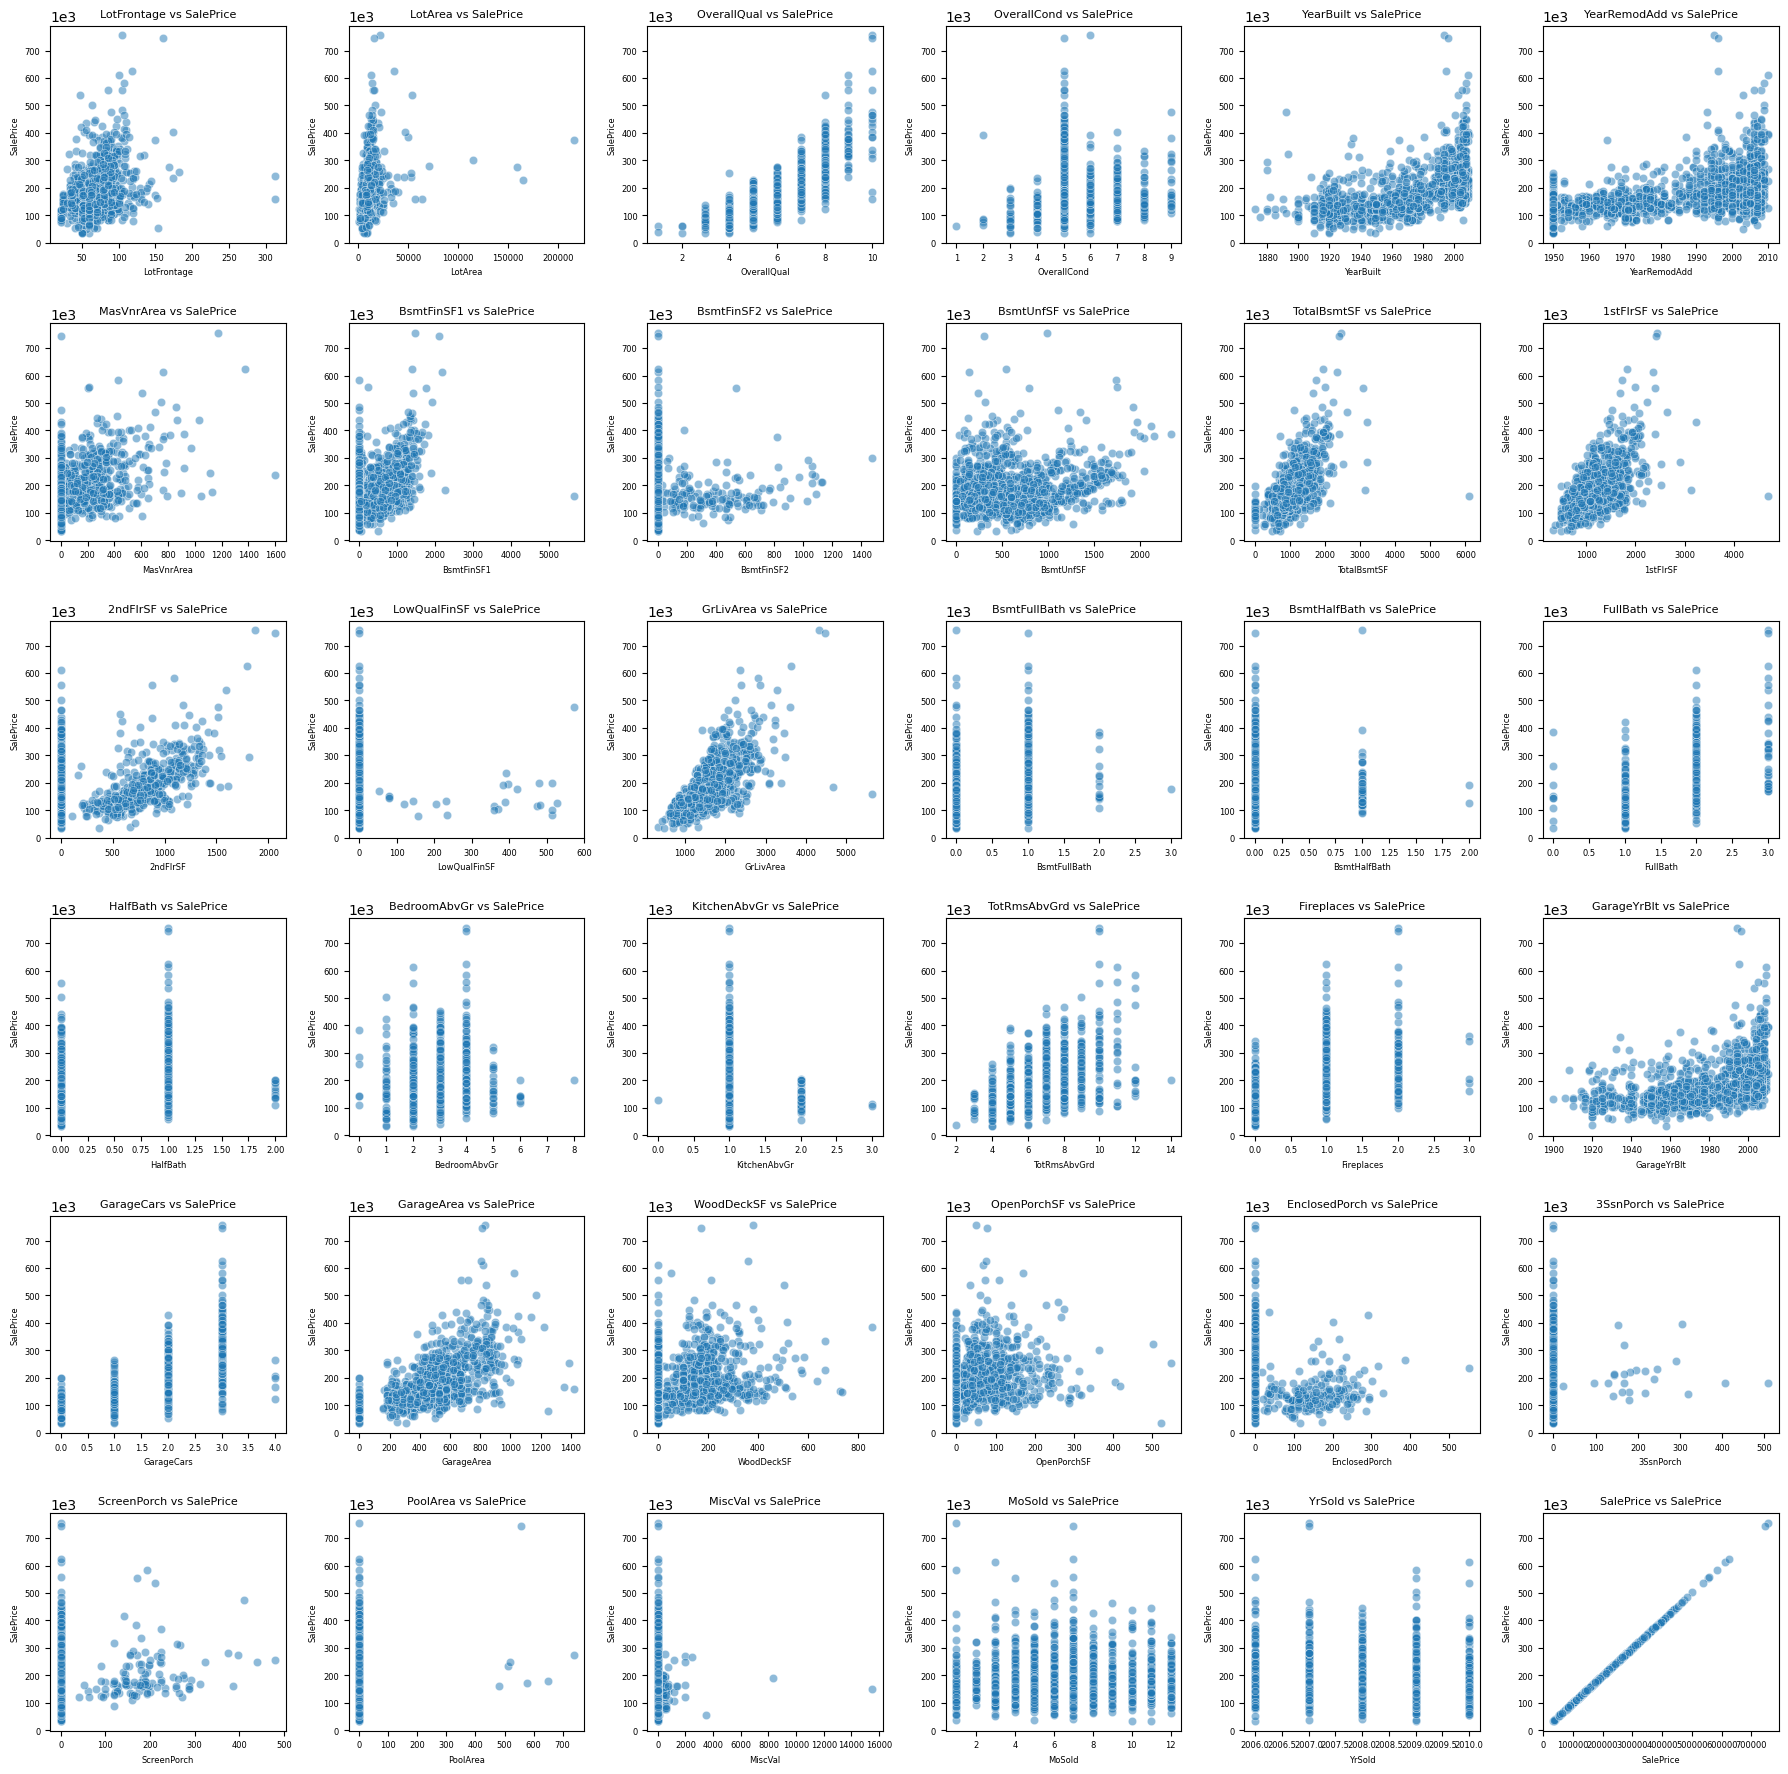

In [49]:
# 检查特征相关性
import seaborn as sns
import matplotlib.pyplot as plt
target = 'SalePrice'

fig, axes = plt.subplots(6, 6, figsize=(18, 18))  # 每个子图大小 (3x3)
axes = axes.flatten()  # 转换为 1D 数组，方便索引

# 遍历数值特征并绘制散点图
for i, feature in enumerate(features_numr):
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}", fontsize=8)
    axes[i].set_xlabel(feature, fontsize=6)
    axes[i].set_ylabel(target, fontsize=6)
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(3, 3))

# 移除多余的空白子图（如果特征数不足 36）
for j in range(len(features_numr), 36):
    fig.delaxes(axes[j])

# 调整子图布局
plt.tight_layout()
plt.show()

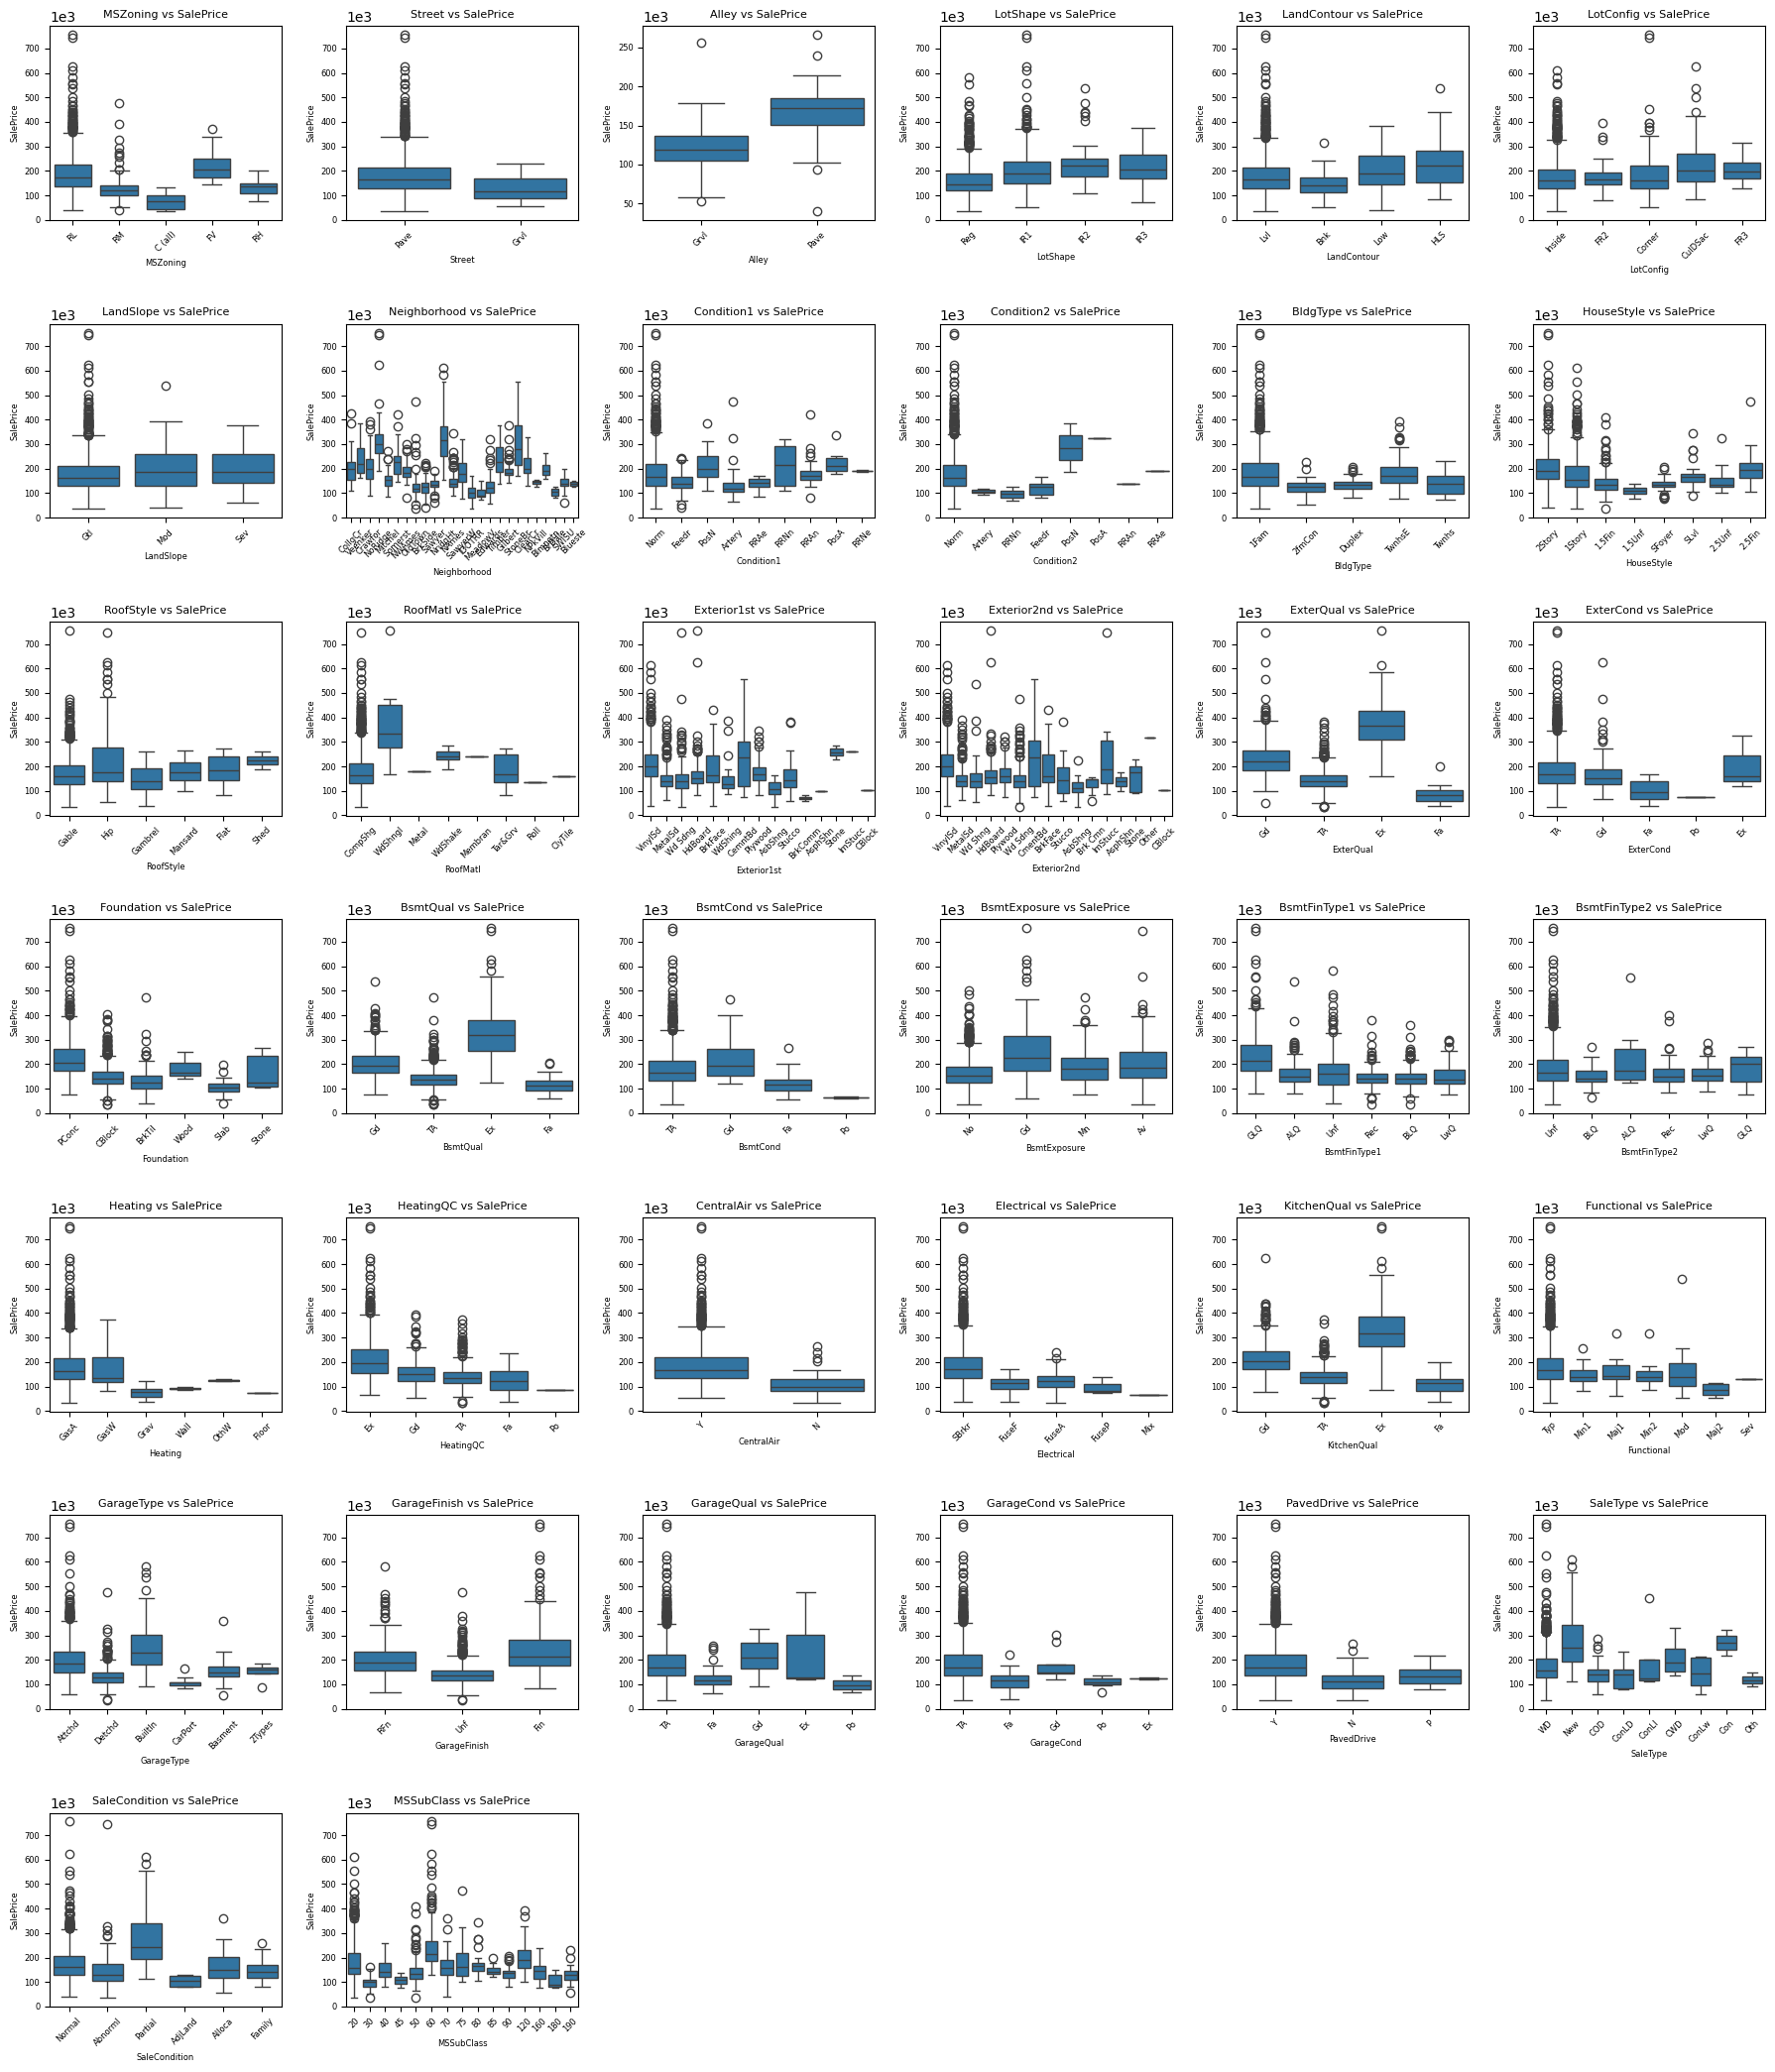

In [50]:
# 设置子图的行数和列数
rows, cols = 7, 6

# 创建 7x6 子图
fig, axes = plt.subplots(rows, cols, figsize=(18, 21))  # 每个子图约 3x3 大小
axes = axes.flatten()  # 转换为一维数组，方便索引

# 遍历类别特征并绘制箱线图
for i, feature in enumerate(features_cate):
    sns.boxplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}", fontsize=8)
    axes[i].set_xlabel(feature, fontsize=6)
    axes[i].set_ylabel(target, fontsize=6)
    axes[i].tick_params(axis='x', rotation=45)  # 旋转 x 轴标签，防止重叠
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(3, 3))
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)

# 移除多余的空白子图（如果特征数不足 42）
for j in range(len(features_cate), rows * cols):
    fig.delaxes(axes[j])

# 调整子图布局
plt.tight_layout()
plt.show()

In [51]:
df["YearRemodAdd"] = df["YearRemodAdd"].fillna(df["YearBuilt"]) # 根据文档, 没有值代表和上一个相同
df["Alley"] = df["Alley"].fillna("None") # Alley留空是没有

# 填充缺失值
for col in df.columns:
    if col in features_cate:
        # 分类特征填充为最频繁值（众数）
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # 数值特征填充为中位数
        df[col] = df[col].fillna(df[col].median())
df = pd.get_dummies(df, columns=features_cate, drop_first=True)  # drop_first=True 避免多重共线性

In [52]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,True,False,False,False,False,False,False,False,False,False
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,False,False,False,False,False,False,False,False,False,False
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,True,False,False,False,False,False,False,False,False,False
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,False,True,False,False,False,False,False,False,False,False
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,True,False,False,False,False,False,False,False,False,False


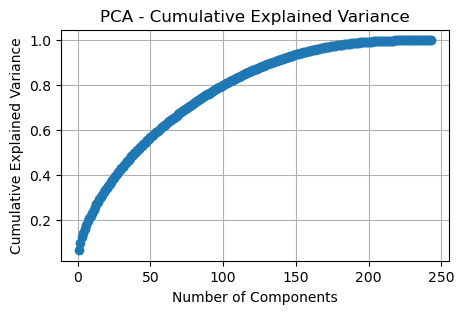

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['SalePrice'])  # 只保留特征
scaler = StandardScaler() # 标准化
X = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
# 查看每个主成分的方差贡献率
explained_variance_ratio = pca.explained_variance_ratio_
# 计算累积方差贡献率
cumulative_variance = explained_variance_ratio.cumsum()
# 显示前 20 个主成分的累积方差

plt.figure(figsize=(5,3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid()
plt.show()


In [54]:
# 降维到150 
k = 150
pca = PCA(n_components=k) 
X_pca = pca.fit_transform(X)
# 转换为 DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])

# 重新合并目标值
df_pca = pd.concat([X_pca, df['SalePrice']], axis=1)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,SalePrice
0,4.659438,-1.730706,-0.836285,2.135240,0.397601,-1.582448,1.667491,-0.532543,1.391989,-1.091968,...,-0.172500,-0.308853,0.246864,0.045588,0.055008,-0.046692,-0.161406,0.175821,-0.077531,208500
1,-0.138909,3.138240,-0.361834,-0.027604,-0.775232,-0.227227,-0.073446,0.563640,1.611806,1.493122,...,-0.282473,0.310620,-0.385016,0.780733,0.066849,-0.726397,-0.563999,0.125684,-0.332997,181500
2,5.095066,-1.307698,-0.437406,1.617079,-0.177998,-1.919246,1.781048,-0.447499,1.445763,-0.666338,...,-0.008306,-0.031515,0.486226,0.067356,-0.051395,-0.895429,0.072843,-0.257875,-0.258174,223500
3,-1.554131,-1.956595,2.362041,0.330195,-1.620712,-1.145132,-1.007411,0.527458,0.516563,0.091735,...,-0.070405,0.376222,-1.274995,-0.625986,-0.199067,-1.299113,-0.764893,0.213041,0.569890,140000
4,6.640381,-1.044432,2.142268,2.241182,-0.160806,-1.243239,1.215117,-1.403042,1.501317,-0.883710,...,0.030797,0.558575,0.421224,-0.025452,-0.286659,-0.413200,0.509853,0.321383,0.169588,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.534310,-2.281352,-0.234522,2.801509,2.078050,-1.774019,1.091417,0.310450,-0.913566,-0.181100,...,-0.299785,-0.223546,0.652579,0.459389,-0.122140,0.060408,-0.541862,-0.018105,0.002338,175000
1456,-0.248242,5.151246,1.598998,0.531080,-0.185433,1.138593,-0.298728,-0.214949,-2.520678,-0.919948,...,0.590298,-0.133607,-0.013807,-0.139360,0.609486,-0.125489,-0.077990,0.478791,0.986731,210000
1457,0.377508,-2.167247,3.187081,1.204650,-3.596860,0.800614,-1.681836,-1.841454,1.472208,-0.215242,...,-0.402322,-0.177838,0.362097,0.735202,1.787694,1.542104,0.913125,0.008695,1.776844,266500
1458,-2.841759,3.757267,-1.336847,-0.797608,-1.707834,-0.714560,-1.593655,0.527102,-0.211506,-0.287205,...,0.053684,0.746527,-2.096267,-0.328495,-0.472465,-0.854545,-0.279563,0.866907,0.194895,142125


## _从这里开始, 数据预处理结束, 开始使用pytorch训练_

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [56]:
# 提取特征和目标变量
X = df_pca.iloc[:, :-1].values  # 前150列 (PCA0 - PCA149)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(df_pca[['SalePrice']])  # 标准化 SalePrice

# 训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# 转换向量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # 需要转换为列向量
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class HousingModel(nn.Module):
    def __init__(self, input_dim):
        super(HousingModel, self).__init__()
        # self.fc1 = nn.Linear(input_dim, 256)
        # self.fc2 = nn.Linear(256, 64)
        # self.fc3 = nn.Linear(64, 1)
        self.model = nn.Linear(input_dim, 1)
    def forward(self, x):
    #     x_copy = x.clone()
    #     x = F.relu(self.fc1(x))
    #     x = F.relu(self.fc2(x))
    #    # x = x + x_copy
    #     x = self.fc3(x)
        return self.model(x)

In [57]:
input_dim = X_train.shape[1]  # 获取输入特征数
model = HousingModel(input_dim)
# 定义损失函数（均方误差 MSE）和优化器（Adam）
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 学习率 0.001
num_epochs = 400  # 训练轮数
batch_size = 128  # 批次大小

from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)




In [58]:
# 训练模型
for epoch in range(num_epochs):
    model.train()  # 训练模式
    epoch_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  # 清空梯度
        predictions = model(batch_X)  # 前向传播
        loss = criterion(predictions, batch_y)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数
        epoch_loss += loss.item()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        model.eval()  # 评估模式, 用来跑test数据
        with torch.no_grad():
            y_pred = model(X_test_tensor)
            test_loss = criterion(y_pred, y_test_tensor).item()
        model.train()
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss / len(train_loader):.4f}, Test Loss:{test_loss:.4f}')

Epoch [10/400], Train Loss: 1.2419, Test Loss:0.8867
Epoch [20/400], Train Loss: 1.0495, Test Loss:0.7707
Epoch [30/400], Train Loss: 0.9037, Test Loss:0.6702
Epoch [40/400], Train Loss: 0.7762, Test Loss:0.5850
Epoch [50/400], Train Loss: 0.6746, Test Loss:0.5134
Epoch [60/400], Train Loss: 0.6278, Test Loss:0.4493
Epoch [70/400], Train Loss: 0.4984, Test Loss:0.3922
Epoch [80/400], Train Loss: 0.4336, Test Loss:0.3441
Epoch [90/400], Train Loss: 0.3812, Test Loss:0.3038
Epoch [100/400], Train Loss: 0.3346, Test Loss:0.2680
Epoch [110/400], Train Loss: 0.3047, Test Loss:0.2381
Epoch [120/400], Train Loss: 0.2634, Test Loss:0.2122
Epoch [130/400], Train Loss: 0.2268, Test Loss:0.1909
Epoch [140/400], Train Loss: 0.2037, Test Loss:0.1727
Epoch [150/400], Train Loss: 0.1980, Test Loss:0.1572
Epoch [160/400], Train Loss: 0.1771, Test Loss:0.1448
Epoch [170/400], Train Loss: 0.1575, Test Loss:0.1347
Epoch [180/400], Train Loss: 0.1519, Test Loss:0.1266
Epoch [190/400], Train Loss: 0.1832, 

## 读取测试数据并作答

In [59]:
df = pd.read_csv("data/test.csv")

In [60]:
for feature in ls:
    df.drop(columns=[feature], inplace=True)

In [61]:
df["YearRemodAdd"] = df["YearRemodAdd"].fillna(df["YearBuilt"]) # 根据文档, 没有值代表和上一个相同
df["Alley"] = df["Alley"].fillna("None") 
# Alley留空是没有

# 填充缺失值
for col in df.columns:
    if col in features_cate:
        # 分类特征填充为最频繁值（众数）
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # 数值特征填充为中位数
        df[col] = df[col].fillna(df[col].median())
df = pd.get_dummies(df, columns=features_cate, drop_first=True)  # drop_first=True 避免多重共线性

In [62]:
import numpy as np
X = df
scaler = StandardScaler() # 标准化
X = scaler.fit_transform(X)
pca = PCA(n_components=k) 
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(k)])
X_numpy = X.to_numpy(dtype=np.float32)  # 或者 X.values
X_tensor = torch.tensor(X_numpy, dtype=torch.float32)

y_pred = model(X_tensor)
y_pred_numpy = y_pred.detach().numpy()  # 如果是 PyTorch Tensor，转换为 NumPy
# 反标准化
y_pred_original = scaler_y.inverse_transform(y_pred_numpy)

In [63]:
y_pred_original

array([[111189.945],
       [162470.05 ],
       [255497.48 ],
       ...,
       [193600.   ],
       [199417.52 ],
       [290788.72 ]], shape=(1459, 1), dtype=float32)

In [64]:
y_pred_original = y_pred_original.flatten()
# 生成 Id 列，从 1461 开始
ids = np.arange(1461, 1461 + len(y_pred_original))
# 创建 DataFrame
submission = pd.DataFrame({"Id": ids, "SalePrice": y_pred_original})
# 保存为 CSV 文件
submission.to_csv("submission-mlp.csv", index=False)